<a href="https://colab.research.google.com/github/127-0-0-vvk/DeepCNN_Image_classfier/blob/main/DeepCNN_Image_classfier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 14 kB/s 
     |████████████████████████████████| 511.8 MB 9.5 kB/s 


In [ ]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.2.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.10.3
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.8
bokeh

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [ ]:
gpus

[]

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

###Remove dodgy images


In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
data_dir = '/content/mydrive/MyDrive/data'

In [ ]:
os.listdir(data_dir)

['happy', 'sad']

In [ ]:
image_exts =  ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
image_exts[3]

'png'

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

###Load the DATA



In [ ]:
tf.data.Dataset??

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/mydrive/MyDrive/data')

Found 165 files belonging to 2 classes.


In [ ]:
#it helps when we deal with massive amount of data

data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()


In [ ]:
batch[0].max()

255.0

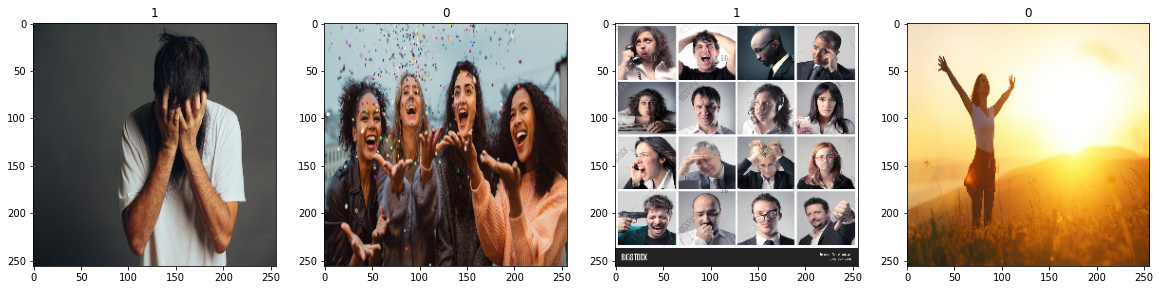

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

###Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.1364277 , 0.3878217 , 0.5298254 ],
          [0.12693015, 0.38679534, 0.5395374 ],
          [0.11536458, 0.39008886, 0.5529412 ],
          ...,
          [0.60185355, 0.76263785, 0.8410692 ],
          [0.6039216 , 0.7647059 , 0.84313726],
          [0.6039216 , 0.7647059 , 0.84313726]],
 
         [[0.15878424, 0.4082054 , 0.548048  ],
          [0.15896268, 0.413     , 0.5586942 ],
          [0.1407048 , 0.4000158 , 0.5502782 ],
          ...,
          [0.60185355, 0.76263785, 0.8410692 ],
          [0.6039216 , 0.7647059 , 0.84313726],
          [0.6055179 , 0.7663022 , 0.8447336 ]],
 
         [[0.18422708, 0.4303381 , 0.5661151 ],
          [0.19425653, 0.43763813, 0.5721819 ],
          [0.18106277, 0.41537872, 0.54474676],
          ...,
          [0.6020434 , 0.7628277 , 0.84125906],
          [0.60416764, 0.76495194, 0.8433833 ],
          [0.6074675 , 0.7682518 , 0.84668314]],
 
         ...,
 
         [[0.5407565 , 0.45412204, 0.15608281],
          [0.50550

###Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

4

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

####DEEP Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

##Train

In [ ]:
logdir='/content/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 21s 4s/step - loss: 1.0811 - accuracy: 0.4766 - val_loss: 0.6533 - val_accuracy: 0.6562
Epoch 2/20
4/4 [==============================] - 16s 3s/step - loss: 0.6651 - accuracy: 0.5938 - val_loss: 0.6056 - val_accuracy: 0.5312
Epoch 3/20
4/4 [==============================] - 17s 4s/step - loss: 0.6011 - accuracy: 0.5938 - val_loss: 0.5606 - val_accuracy: 0.6875
Epoch 4/20
4/4 [==============================] - 18s 4s/step - loss: 0.5591 - accuracy: 0.7031 - val_loss: 0.4229 - val_accuracy: 0.8438
Epoch 5/20
4/4 [==============================] - 16s 4s/step - loss: 0.5068 - accuracy: 0.7891 - val_loss: 0.5511 - val_accuracy: 0.6250
Epoch 6/20
4/4 [==============================] - 17s 4s/step - loss: 0.4682 - accuracy: 0.6953 - val_loss: 0.4196 - val_accuracy: 0.8750
Epoch 7/20
4/4 [==============================] - 17s 4s/step - loss: 0.4497 - accuracy: 0.7969 - val_loss: 0.3089 - val_accuracy: 0.8750
Epoch 8/20
4/4 [==================

##Plot Performance


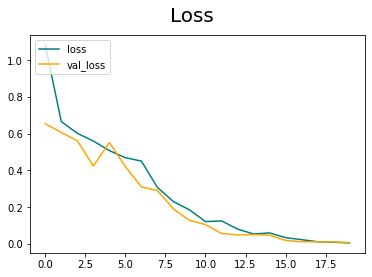

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

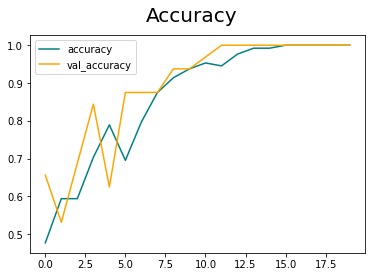

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


##Test

In [ ]:
import cv2

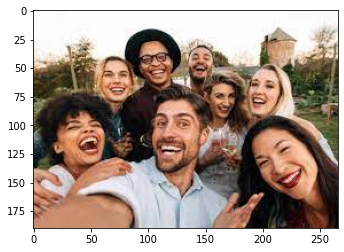

In [ ]:
img = cv2.imread('/content/happytest.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

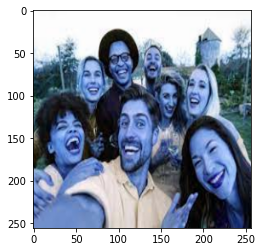

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 41ms/step


In [ ]:
yhat

array([[0.7208181]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Happy')
else:
    print(f'Predicted class is Sad')

Predicted class is Happy


##Save the Model

In [ ]:

from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('/content/models/imageclassifier.h5')

In [ ]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 57ms/step


In [ ]:
if yhat_new > 0.5: 
    print(f'Predicted class is Happy')
else:
    print(f'Predicted class is Sad')

Predicted class is Happy


In [ ]:
""